In [58]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [59]:
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


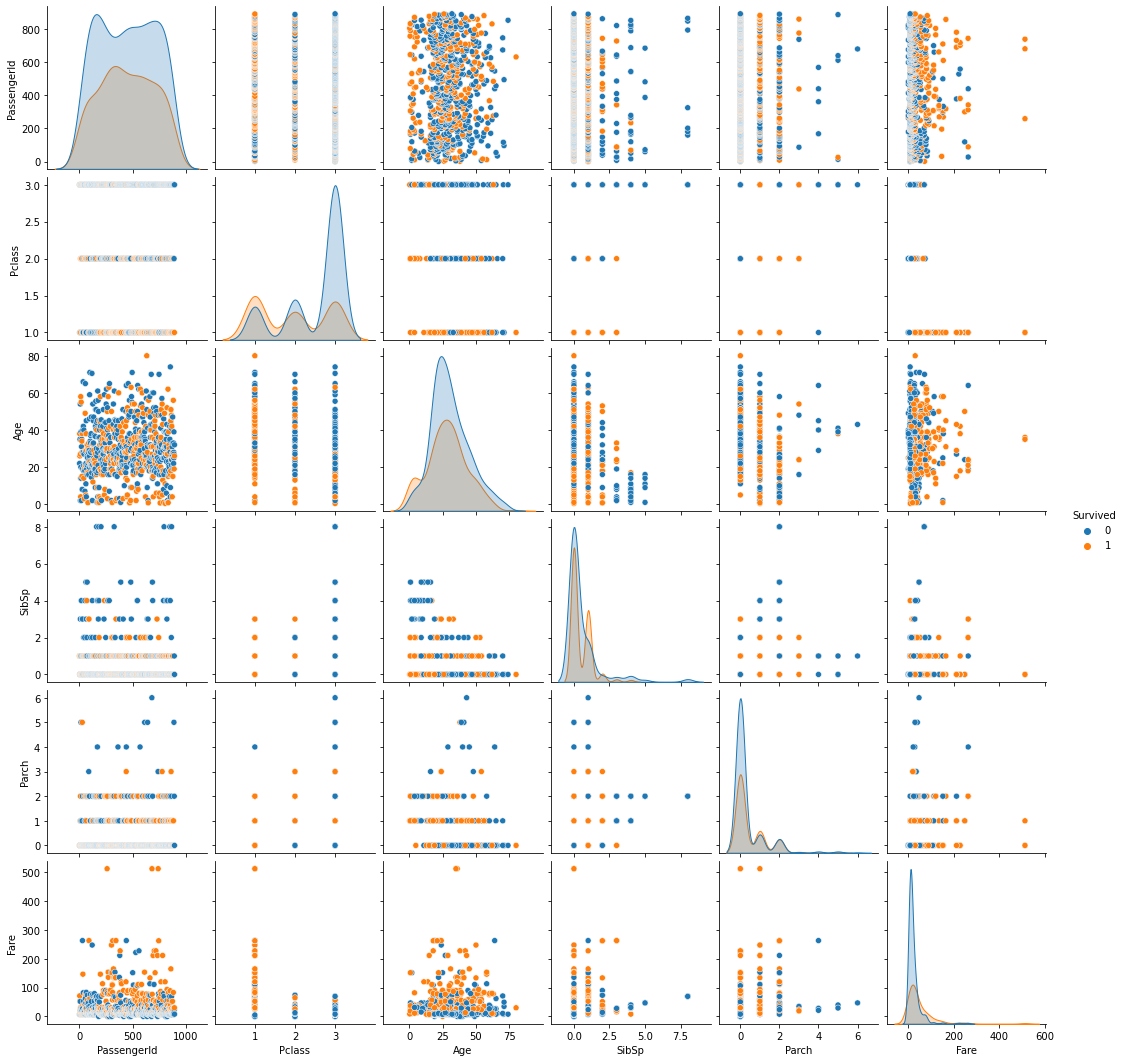

In [62]:
sns.pairplot(data=df,hue = "Survived")

## Train-test split

In [63]:
X = df[['PassengerId', 'Pclass', 'Sex', 'Fare', 'Age', 'Embarked']]
X

,PassengerId,Pclass,Sex,Fare,Age,Embarked
0,1,3,male,7.2500,22.0,S
1,2,1,female,71.2833,38.0,C
2,3,3,female,7.9250,26.0,S
3,4,1,female,53.1000,35.0,S
4,5,3,male,8.0500,35.0,S
...,...,...,...,...,...,...
886,887,2,male,13.0000,27.0,S
887,888,1,female,30.0000,19.0,S
888,889,3,female,23.4500,NaN,S
889,890,1,male,30.0000,26.0,C


In [64]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [67]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((712, 6), (179, 6), (179,), (712,))

In [68]:
X_train.head()
#X_train.shape

,PassengerId,Pclass,Sex,Fare,Age,Embarked
331,332,1,male,28.5000,45.5,S
733,734,2,male,13.0000,23.0,S
382,383,3,male,7.9250,32.0,S
704,705,3,male,7.8542,26.0,S
813,814,3,female,31.2750,6.0,S


### Feature transformation

#### Column transformer

In [69]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [70]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse = False, handle_unknown= 'ignore')
    
)

In [71]:
num_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler()
)

In [72]:
feature_transform = ColumnTransformer([
    ('do_nothing', 'passthrough', ['Pclass', 'PassengerId']),
    ('cat_preprocessing', cat_pipe, ['Sex', 'Embarked']),
   
    ('num_preprocessing', num_pipe, ['Fare', 'Age']),
   
    ])

#### Fitting the train dataset

In [74]:
X_train_trans = feature_transform.fit_transform(X_train) 
X_train_trans
X_train_trans.shape

array([[1.00000000e+00, 3.32000000e+02, 0.00000000e+00, ...,
        1.00000000e+00, 5.56282952e-02, 5.66473988e-01],
       [2.00000000e+00, 7.34000000e+02, 0.00000000e+00, ...,
        1.00000000e+00, 2.53743101e-02, 2.83739633e-01],
       [3.00000000e+00, 3.83000000e+02, 0.00000000e+00, ...,
        1.00000000e+00, 1.54685698e-02, 3.96833375e-01],
       ...,
       [3.00000000e+00, 8.61000000e+02, 0.00000000e+00, ...,
        1.00000000e+00, 2.75375676e-02, 5.09927117e-01],
       [1.00000000e+00, 4.36000000e+02, 1.00000000e+00, ...,
        1.00000000e+00, 2.34224401e-01, 1.70645891e-01],
       [1.00000000e+00, 1.03000000e+02, 0.00000000e+00, ...,
        1.00000000e+00, 1.50855153e-01, 2.58607690e-01]])

In [34]:
df['Embarked'].unique

<bound method Series.unique of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

#### Transforming the test data set

In [35]:
X_test_trans = feature_transform.transform(X_test)

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
m = LogisticRegression()
m.fit(X_train_trans,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
m

LogisticRegression()

### Evaluating the logistic regression model

In [39]:
round(m.score(X_train_trans, y_train),2)

0.79

In [40]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [41]:
round(m.score(X_test_trans, y_test),2)

0.79

#### Predictions

In [42]:
m.predict_proba(X_train_trans)

array([[0.67306014, 0.32693986],
       [0.77269191, 0.22730809],
       [0.91519788, 0.08480212],
       ...,
       [0.90517025, 0.09482975],
       [0.09616924, 0.90383076],
       [0.63122953, 0.36877047]])

In [43]:
X_train_trans.shape

(712, 9)

In [44]:
y_test.shape

(179,)

In [45]:
y_pred = m.predict(X_test_trans)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

#### To compare using classification

In [46]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred)

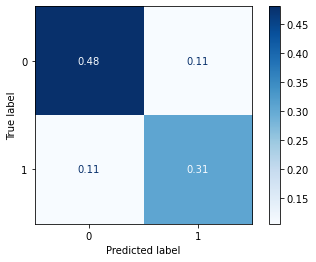

In [47]:
from sklearn.metrics import plot_confusion_matrix

#percentages 
plot_confusion_matrix(estimator=m,
                     X=X_test_trans,
                     y_true=y_test,
                     normalize='all',
                     cmap='Blues')

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [80]:
X_train.head().columns

Index(['PassengerId', 'Pclass', 'Sex', 'Fare', 'Age', 'Embarked'], dtype='object')

## Fit a Random Forest Model

In [49]:
from sklearn.ensemble import RandomForestClassifier

m_rf = RandomForestClassifier(n_estimators=100, max_depth=3)

m_rf.fit(X_train_trans, y_train)

RandomForestClassifier(max_depth=3)

### Fit a decision tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
m_t = DecisionTreeClassifier(max_depth=3)
m_t.fit(X_train_trans, y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
from sklearn.tree import plot_tree

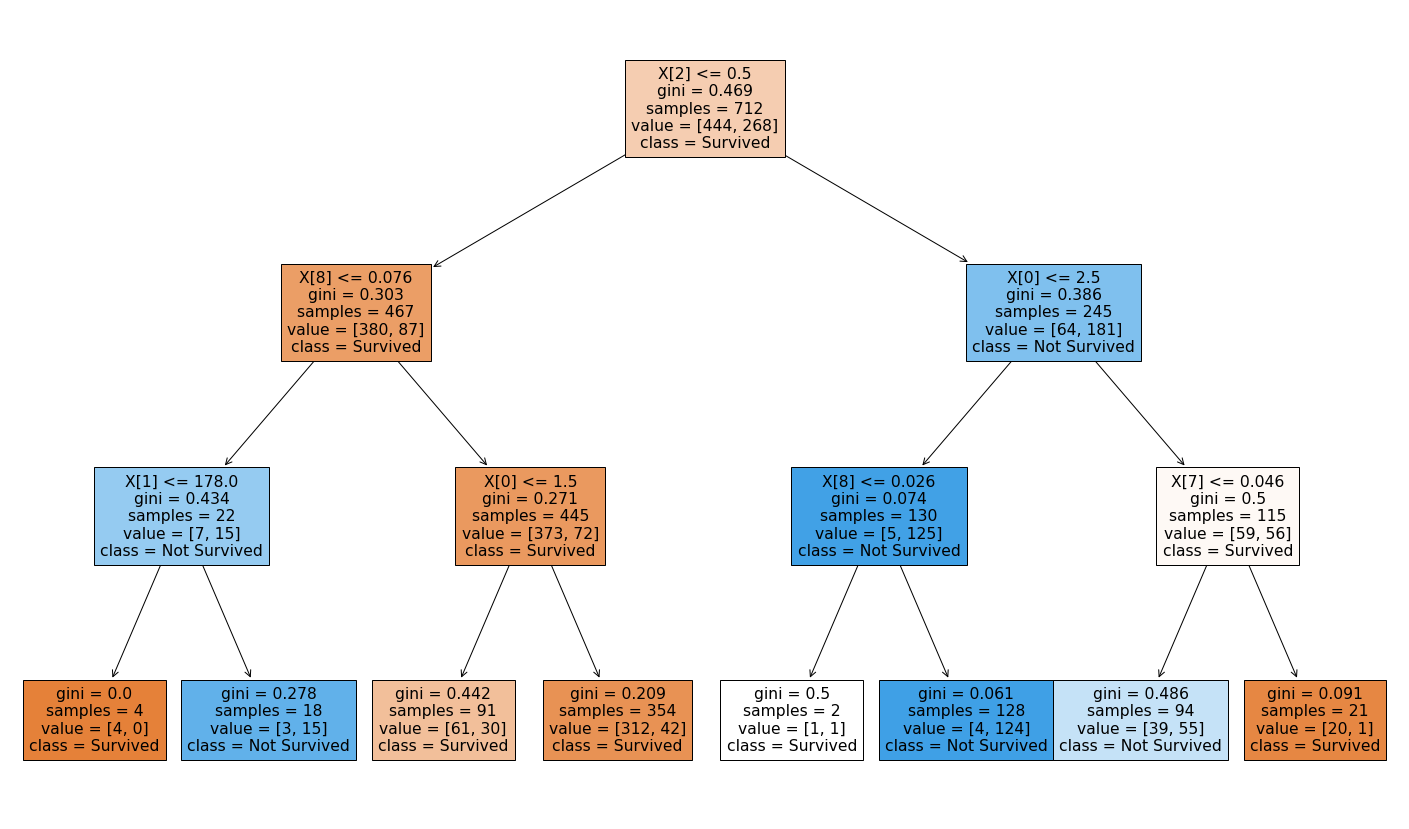

In [88]:
plt.figure(figsize = (25,15))
t = plot_tree(m_t, feature_names = None, class_names= ["Survived", "Not Survived"], filled=True)

#### Check train and test score

In [263]:
f' Train scores: Random Forest {round(m_rf.score(X_train_trans,y_train),3)}, Decision Trees {round(m_t.score(X_train_trans,y_train),3)}, LogReg {round(m.score(X_train_trans,y_train),3)}'

' Train scores: Random Forest 0.82, Decision Trees 0.831, LogReg 0.789'

In [264]:
f' Train scores: Random Forest {round(m_rf.score(X_test_trans,y_test),3)}, Decision Trees {round(m_t.score(X_test_trans,y_test),3)}, LogReg {round(m.score(X_test_trans,y_test),3)}'

' Train scores: Random Forest 0.793, Decision Trees 0.793, LogReg 0.788'

### Cross validation

In [265]:
from sklearn.model_selection import cross_val_score

In [266]:
#For the logistic regression model
cross_val_score(m, X_train_trans, y_train, cv = 5)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.79020979, 0.81118881, 0.76056338, 0.73239437, 0.83802817])

In [267]:
# For the decision tree
cross_val_score(m_t, X_train_trans, y_train, cv = 5)

array([0.81818182, 0.83216783, 0.8028169 , 0.78873239, 0.83098592])

In [268]:
# For the forest
cross_val_score(m_rf, X_train_trans, y_train, cv = 5)

array([0.81118881, 0.83216783, 0.76760563, 0.76760563, 0.81690141])